In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
titanic = sns.load_dataset("titanic")

# Display the first 5 rows
print(titanic.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [3]:
titanic = titanic.assign(age=titanic['age'].fillna(titanic['age'].median()))
titanic.dropna(subset=['embark_town'], inplace=True)


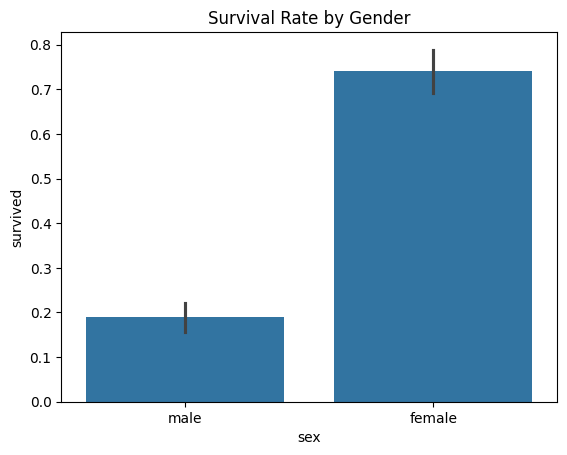

In [4]:
sns.barplot(x="sex", y="survived", data=titanic)
plt.title("Survival Rate by Gender")
plt.show()


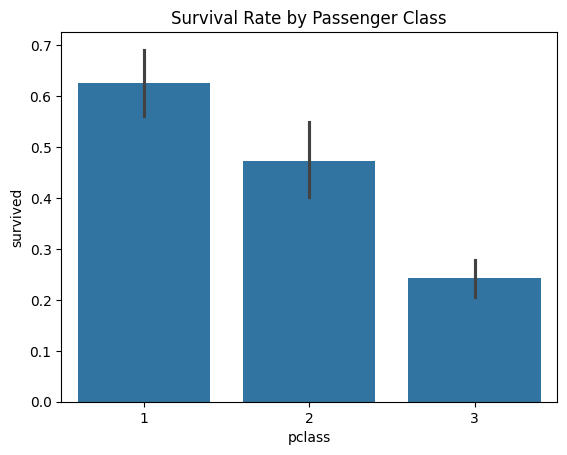

In [5]:
sns.barplot(x="pclass", y="survived", data=titanic)
plt.title("Survival Rate by Passenger Class")
plt.show()


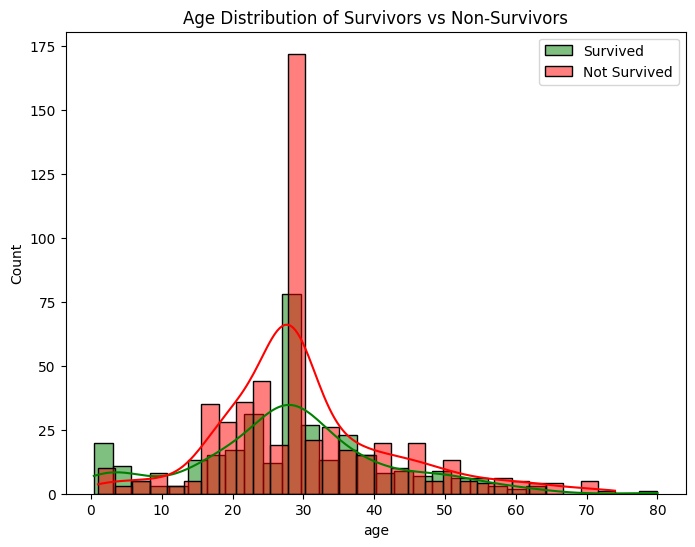

In [6]:
plt.figure(figsize=(8,6))
sns.histplot(titanic[titanic['survived'] == 1]['age'], bins=30, kde=True, color="green", label="Survived")
sns.histplot(titanic[titanic['survived'] == 0]['age'], bins=30, kde=True, color="red", label="Not Survived")
plt.legend()
plt.title("Age Distribution of Survivors vs Non-Survivors")
plt.show()


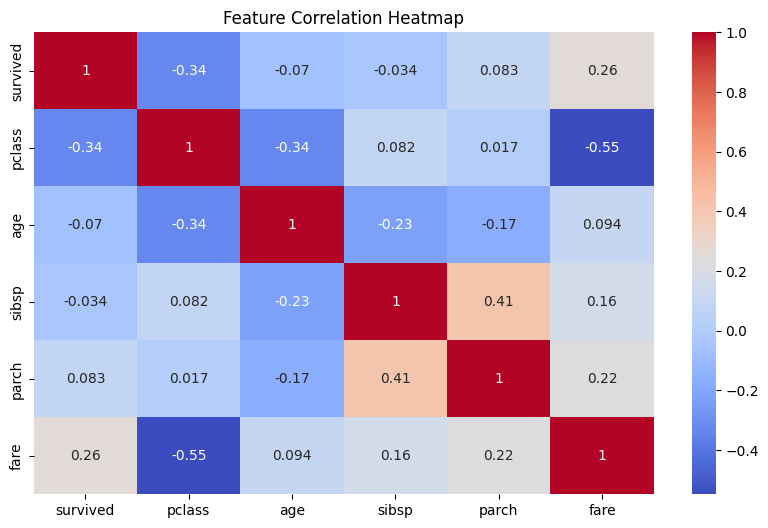

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert categorical columns to numeric (optional: drop unnecessary columns)
titanic_numeric = titanic.select_dtypes(include=['number'])  

# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(titanic_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [8]:
# Survival rate by embarkation point
embarkation_survival = df.groupby('Embarked')['Survived'].mean() * 100
print(embarkation_survival)a

SyntaxError: invalid syntax (2984958775.py, line 3)